In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn import preprocessing
import glob

import librosa
import librosa.display

from scipy.io.wavfile import write

In [16]:
s1, sr1 = librosa.load('data/LibriSpeech/dev-clean/84/121123/84-121123-0000.flac')
print(type(s1), type(sr1))
print(s1.shape, sr1)

<class 'numpy.ndarray'> <class 'int'>
(46085,) 22050


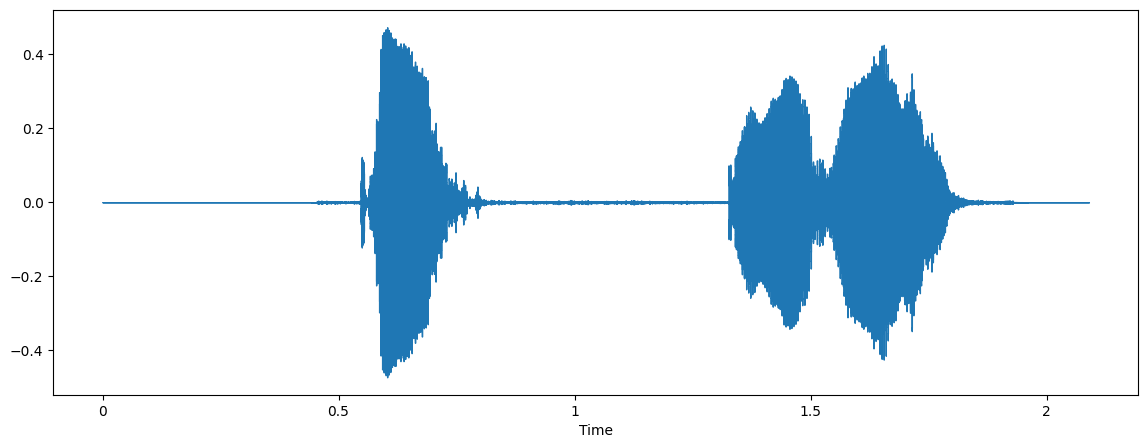

In [17]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(s1, sr=sr1)

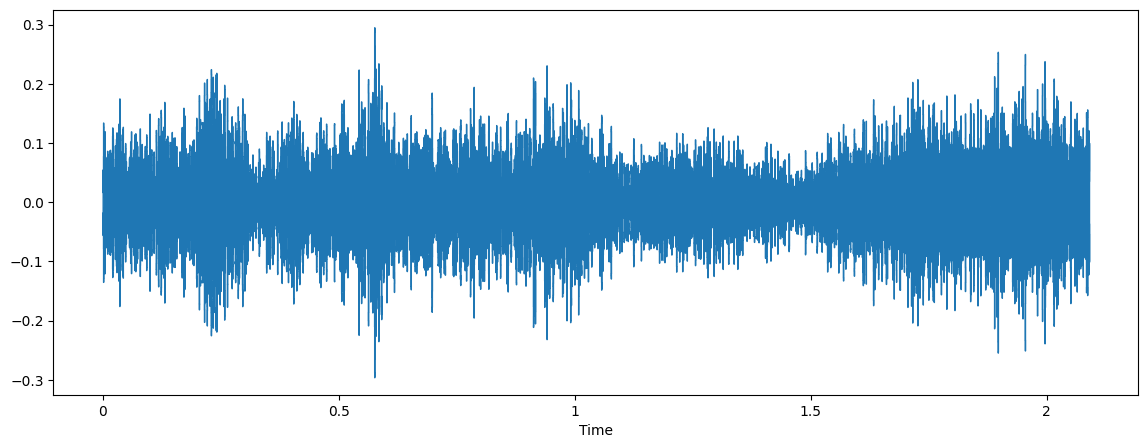

In [18]:
u, ur = librosa.load('data/noise/babble.wav')
plt.figure(figsize=(14, 5))
librosa.display.waveshow(u[:len(s1)], sr=ur)

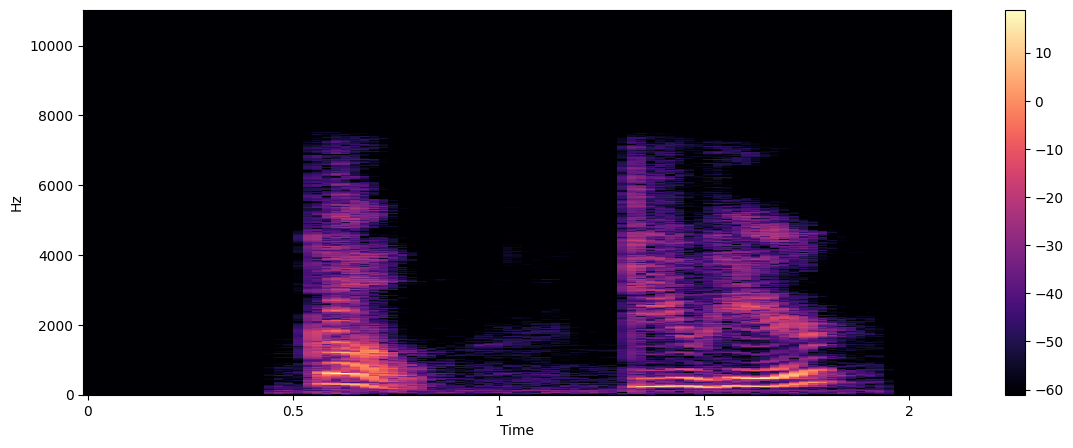

In [19]:
s_norm = preprocessing.normalize([s1])
u_norm = preprocessing.normalize([u[:len(s1)]])
S = librosa.stft(s_norm[0])
Sdb = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Sdb, sr=sr1, x_axis='time', y_axis='hz')
plt.colorbar()

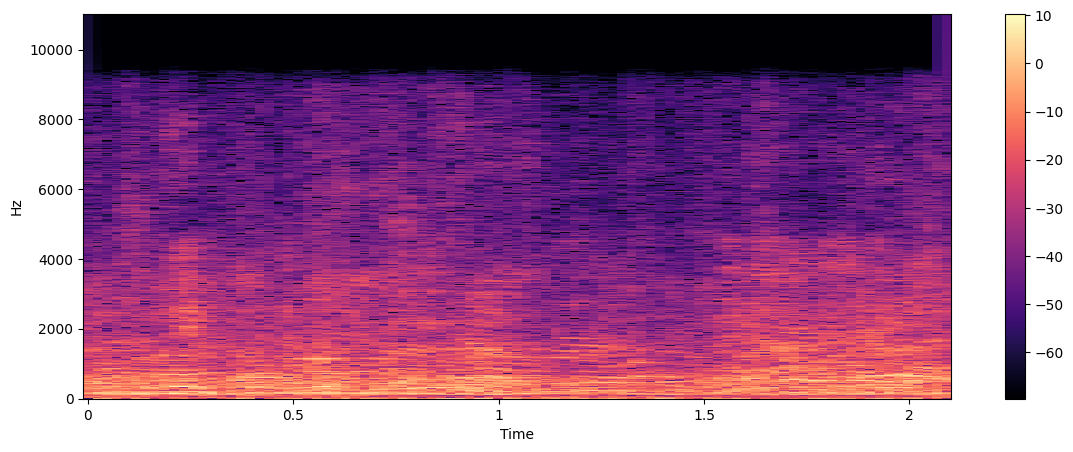

In [20]:
U = librosa.stft(u_norm[0])
Udb = librosa.amplitude_to_db(abs(U))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Udb, sr=ur, x_axis='time', y_axis='hz')
plt.colorbar()

In [21]:
def alpha(RSB):
    return 10 ** (-RSB / 20)

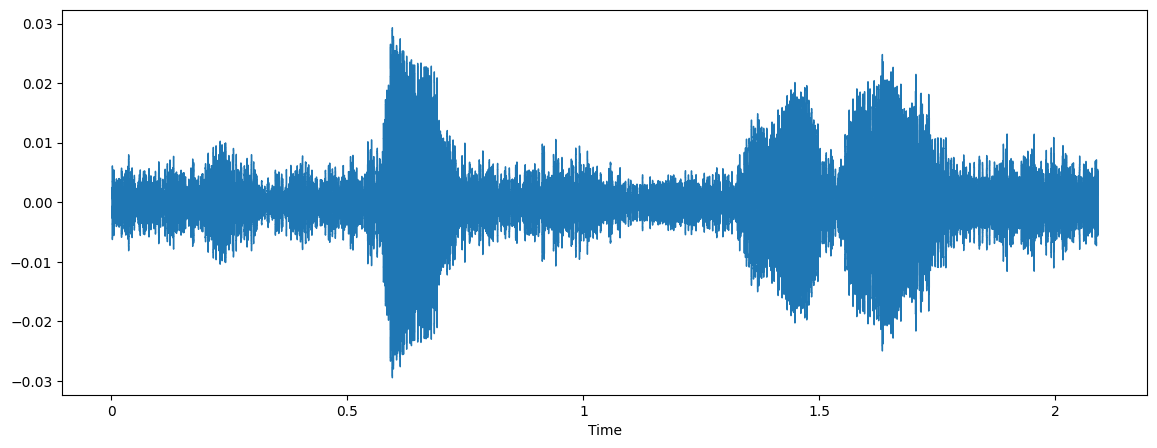

In [22]:
x = s_norm + alpha(5) * u_norm
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr1)

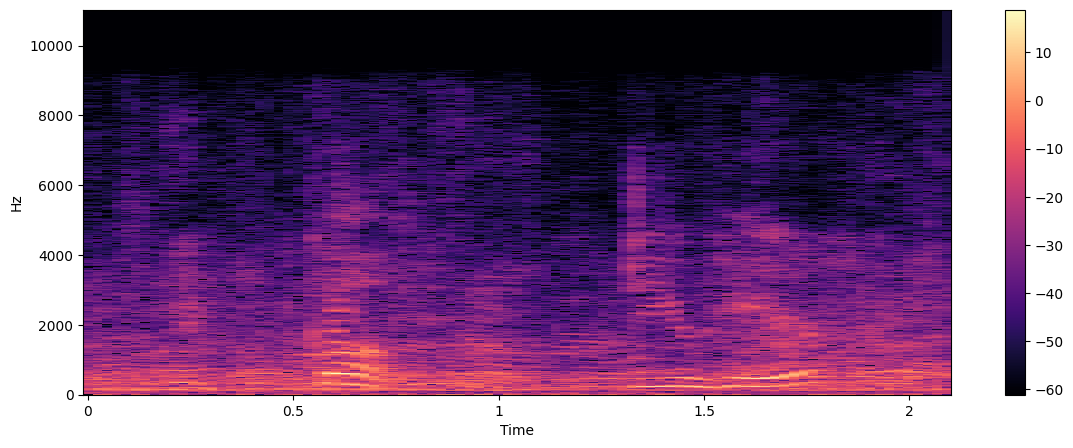

In [23]:
X = librosa.stft(x[0])
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=ur, x_axis='time', y_axis='hz')
plt.colorbar()

In [24]:
u1, ur1 = librosa.load('data/noise/babble.wav')
U1, phase = librosa.magphase(librosa.stft(u1))
rms = librosa.feature.rms(S=U1)

[Text(0.5, 1.0, 'log Power spectrogram')]

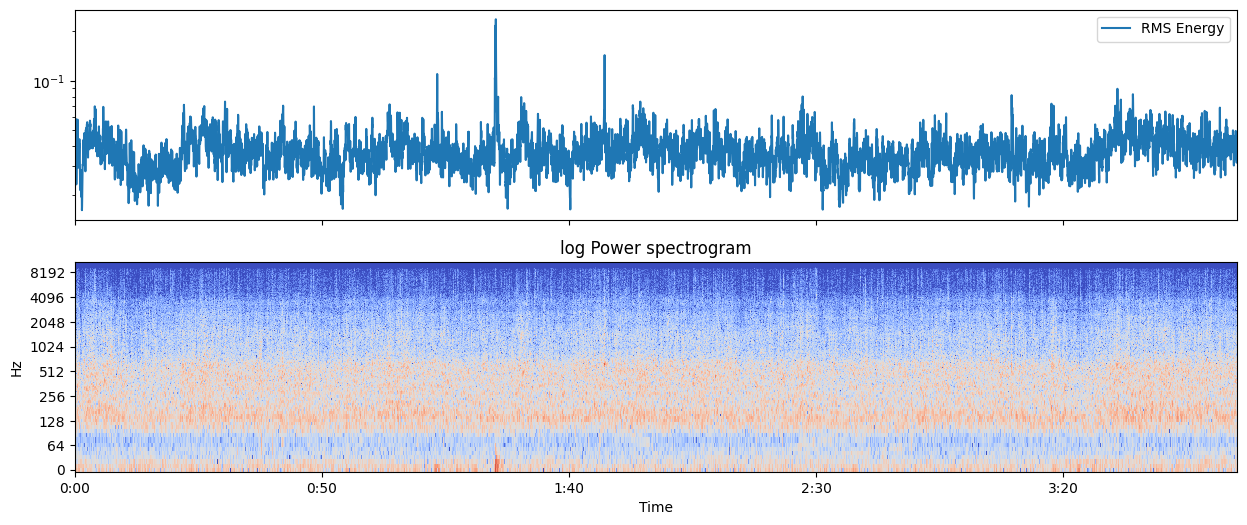

In [25]:
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(U1),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [26]:
noise_file = glob.glob('data/noise/*.wav', recursive=True)
files = glob.glob('data/LibriSpeech/dev-clean/**/**/*.flac', recursive=True)
print(len(files),'clean data files')
print(files[0:4])

8109 clean data files
['data/LibriSpeech/dev-clean\\1272\\128104\\1272-128104-0000.flac', 'data/LibriSpeech/dev-clean\\1272\\128104\\1272-128104-0001.flac', 'data/LibriSpeech/dev-clean\\1272\\128104\\1272-128104-0002.flac', 'data/LibriSpeech/dev-clean\\1272\\128104\\1272-128104-0003.flac']


In [27]:
magnitude_clean, _ = librosa.magphase(S)
_, phase_noise = librosa.magphase(U)
print(phase_noise.shape)

(1025, 91)


In [28]:
test = np.array(magnitude_clean*phase_noise)
output_clean = librosa.istft(test)
write("test.wav", sr1, output_clean)

In [ ]:
write("test.flac", sr1, output_clean)